In [105]:
import   pandas  as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [106]:
data=pd.read_csv(r"C:\Users\grace\Downloads\archive\train.csv")

In [107]:
data.shape

(22750, 9)

In [108]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [109]:
data.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [111]:

# Drop Employee ID, DOJ
data = data.drop(['Employee ID', 'Date of Joining'], axis=1)


In [112]:
data.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

## Droping Duplicates if any

In [113]:
duplicated_rows = data.duplicated()
print(duplicated_rows.sum())

3005


In [114]:
data.drop_duplicates(inplace = True) 

In [115]:
data.shape

(19745, 7)

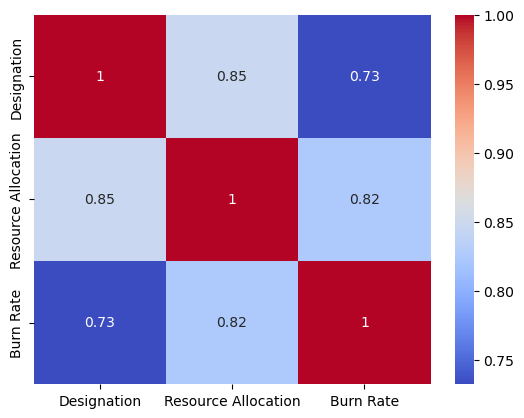

In [116]:
#using heatmap to check duplicates
num_df.corr()
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [117]:
data = data.drop(['Mental Fatigue Score'], axis=1)

## Handling Missing Values

In [118]:
data.isna().sum()

Gender                    0
Company Type              0
WFH Setup Available       0
Designation               0
Resource Allocation    1340
Burn Rate               973
dtype: int64

In [119]:
missing_info = data.isnull().sum().to_frame(name='Missing Count')
missing_info['% of Total'] = (missing_info['Missing Count'] / len(data)) * 100
print(missing_info)

                     Missing Count  % of Total
Gender                           0    0.000000
Company Type                     0    0.000000
WFH Setup Available              0    0.000000
Designation                      0    0.000000
Resource Allocation           1340    6.786528
Burn Rate                      973    4.927830


In [120]:
#Drop rows where target (Burn Rate) is missing


before_drop = data.shape[0]
data = data.dropna(subset=['Burn Rate'])
after_drop = data.shape[0]
# Number of rows dropped
dropped = before_drop - after_drop

print(f"Rows before drop: {before_drop}")
print(f"Rows after drop: {after_drop}")
print(f"Rows dropped: {dropped}")

Rows before drop: 19745
Rows after drop: 18772
Rows dropped: 973


In [121]:
data.isna().sum()

Gender                    0
Company Type              0
WFH Setup Available       0
Designation               0
Resource Allocation    1242
Burn Rate                 0
dtype: int64

In [122]:
num_df= data.select_dtypes(include="number")
cat_df= data.select_dtypes(include="object")
print("Numerical Columns are")
num_cols=num_df.columns.tolist()
print(num_cols)
print("Categorical Columns are")
cat_cols=cat_df.columns.tolist()
print(cat_cols)


Numerical Columns are
['Designation', 'Resource Allocation', 'Burn Rate']
Categorical Columns are
['Gender', 'Company Type', 'WFH Setup Available']


#Histogram

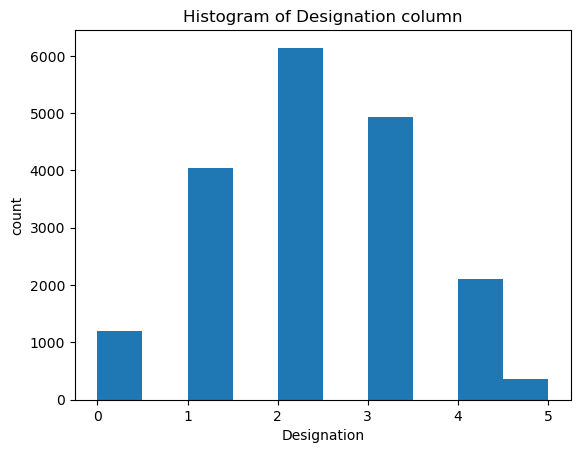

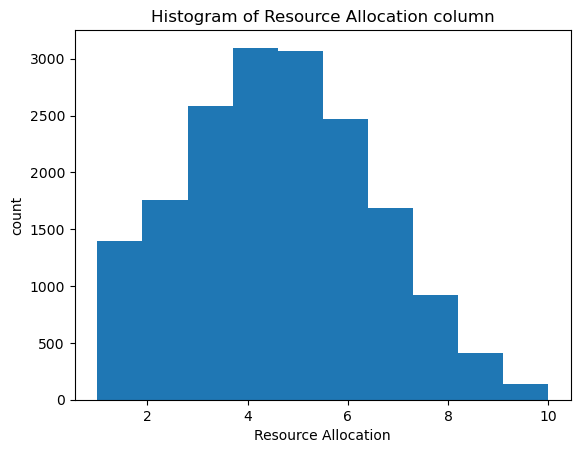

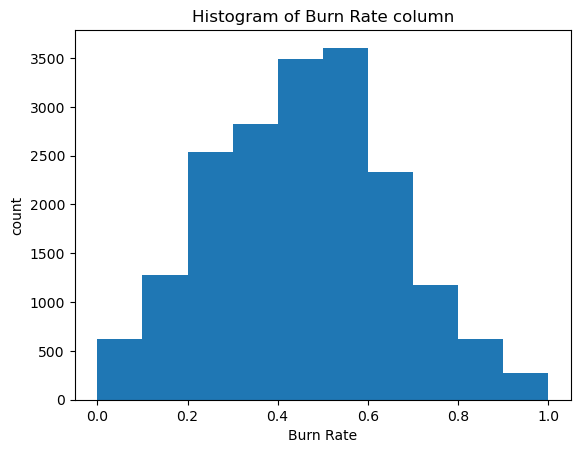

In [123]:
for col in num_cols:
    plt.hist(num_df[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [124]:
#filling for numerical columns

In [125]:

data['Resource Allocation'] = data['Resource Allocation'].fillna(data['Resource Allocation'].median())
num_df = data.select_dtypes(include=['float64', 'int64'])
print(num_df.isna().sum())

Designation            0
Resource Allocation    0
Burn Rate              0
dtype: int64


In [126]:
cat_df.isna().sum() #checking for categorical columns

Gender                 0
Company Type           0
WFH Setup Available    0
dtype: int64

In [127]:
#recombine numerical and categorical colmns
data=pd.concat([num_df,cat_df],axis=1)
data.isna().sum()

Designation            0
Resource Allocation    0
Burn Rate              0
Gender                 0
Company Type           0
WFH Setup Available    0
dtype: int64

In [128]:
data.shape

(18772, 6)

## Outlier

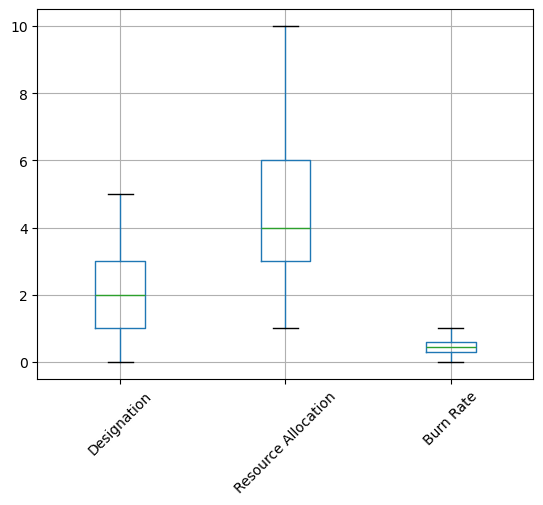

In [129]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [130]:
#checking data imbalance
data['Designation'].value_counts()

Designation
2.0    6141
3.0    4936
1.0    4036
4.0    2100
0.0    1197
5.0     362
Name: count, dtype: int64

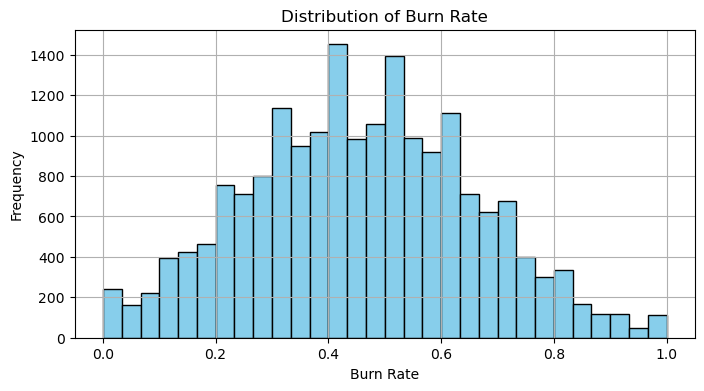

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
data['Burn Rate'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Burn Rate")
plt.xlabel("Burn Rate")
plt.ylabel("Frequency")
plt.show()


## Encoding

In [132]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to be safe
df_label_encoded = data.copy()

# Define the columns to encode
cat_cols = ['Gender', 'Company Type', 'WFH Setup Available']

# Apply LabelEncoder to each categorical column
le = LabelEncoder()
for col in cat_cols:
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])
    print(df_label_encoded[cat_cols].head())


   Gender Company Type WFH Setup Available
0       0      Service                  No
1       1      Service                 Yes
2       0      Product                 Yes
3       1      Service                 Yes
4       0      Service                  No
   Gender  Company Type WFH Setup Available
0       0             1                  No
1       1             1                 Yes
2       0             0                 Yes
3       1             1                 Yes
4       0             1                  No
   Gender  Company Type  WFH Setup Available
0       0             1                    0
1       1             1                    1
2       0             0                    1
3       1             1                    1
4       0             1                    0


## Standaridization

In [133]:
from sklearn.preprocessing import StandardScaler

# Make a copy
df_scaled = df_label_encoded.copy()

# Select numeric columns to scale (exclude target if needed)
num_cols = ['Designation', 'Resource Allocation', 'Burn Rate']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected numeric columns
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

# Preview the result
print(df_scaled[num_cols].head())


   Designation  Resource Allocation  Burn Rate
0    -0.176273            -0.745597  -1.484704
1    -1.048901            -1.243457  -0.483540
2    -0.176273            -0.247737   0.167217
3    -1.048901            -1.741317  -1.284471
4     0.696355             1.245844   0.317392


## Feature SelectionX 



In [134]:
X = df_label_encoded.drop('Burn Rate', axis=1)
y = df_label_encoded['Burn Rate']


In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


## LINEAR REGRESSION

In [136]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error (MAE):  {mae:.4f}")
print(f"Mean Squared Error (MSE):  {mse:.4f}")
print(f"Root Mean Squared Error (RMSE):  {rmse:.4f}")
print(f"R² Score:  {r2:.4f}")


Mean Absolute Error (MAE):  0.0898
Mean Squared Error (MSE):  0.0126
Root Mean Squared Error (RMSE):  0.1124
R² Score:  0.6996
